# Data Exploration and Visualization in Python
## Evaluating sales & marketing data to deliver insights and reccomendations to sales team.

In this project, we have product sales data of a new product from a ficticious company. The goal of this project is to clean and validate the data and explore and visualize the data in order to drive insights and reccomendations to the sales team on best practices moving forward.

# Data Validation:

- `weeks`: No cleaning neccessary. Values are integers and range from 0 to 6 weeks. There are 15000 valid observations.
-  `sales_method`: Text needed to be cleaned so that each observation matched either Email, Call, or Email + Call.
-  `customer_id`: No cleaning needed. All values are unique.
-  `nb_sold`: No cleaning needed. Int type with no NA's
-  `revenue`: Had 1074 NA values. These were filled in with the median revenue grouped by the number of products sold. Observations have been rounded to two decimal places.
-  `years_as_customer`: Since the company was founded in 1984, there were two obsersations where years_as_customer was greater than what is feasible. These observations were replaced with the maximum number of years that would be feasible given the founding date.
-  `nb_site_visits`: No cleaning needed. No missing values, numeric type.
-  `state`: No cleaning needed. All 50 states are represented, with no duplicates.

Cleaning and Data Validation has been conducted below. To see the Data Validation process, please unhide the cells immediatly below.

In [1]:
# Import Pandas and Read CSV as sales
import pandas as pd
# Read CSV
sales = pd.read_csv("product_sales.csv")

In [2]:
# Check sales df
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
# Explore df
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


### Check NA values and data types

In [4]:
# Check for NA values
sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [5]:
# Check datatypes
sales.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

### 1. `week`

In [6]:
# Check unique values - should only be 1-6
sorted(sales['week'].unique())

[1, 2, 3, 4, 5, 6]

In [7]:
# Check for NA values
sales['week'].isna().sum()

0

In [8]:
# Confirm type Int
sales['week'].dtypes

dtype('int64')

In [9]:
# Check Value Counts
print(sales['week'].value_counts())
print(sales['week'].value_counts(normalize=True))

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64
1    0.248067
4    0.171667
5    0.171600
2    0.166067
3    0.160733
6    0.081867
Name: week, dtype: float64


In [10]:
# Check total observations
sales['week'].count()

15000

### 2. `sales_method`

In [11]:
# Check Unique Values
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [12]:
# Replace with proper formatting.
sales['sales_method'] = sales['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

In [13]:
# Confirm new formatted values
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [14]:
# Check value counts
method_count = (sales['sales_method'].value_counts())
method_pct = (sales['sales_method'].value_counts(normalize=True))
method_sum = pd.concat([method_count, method_pct], axis=1)
method_sum.columns = ['count', 'percentage']
print(method_sum)

              count  percentage
Email          7466    0.497733
Call           4962    0.330800
Email + Call   2572    0.171467


### 3. `customer_id`

In [15]:
# Check for duplicates:
sales['customer_id'].duplicated().sum()

0

### 4. `nb_sold`

In [16]:
sales['nb_sold'].dtypes

dtype('int64')

In [17]:
sales['nb_sold'].isna().sum()

0

In [18]:
# Value Counts
nb_sold_count = (sales['nb_sold'].value_counts())
nb_sold_pct = (sales['nb_sold'].value_counts(normalize=True))
nb_sold_sum = pd.concat([nb_sold_count, nb_sold_pct], axis=1)
nb_sold_sum.columns = ['count', 'percentage']
print(nb_sold_sum)

    count  percentage
10   3677    0.245133
9    3535    0.235667
11   2439    0.162600
8    1941    0.129400
12   1088    0.072533
13    939    0.062600
7     698    0.046533
15    555    0.037000
14     97    0.006467
16     31    0.002067


### 5. `revenue`

<AxesSubplot: xlabel='revenue'>

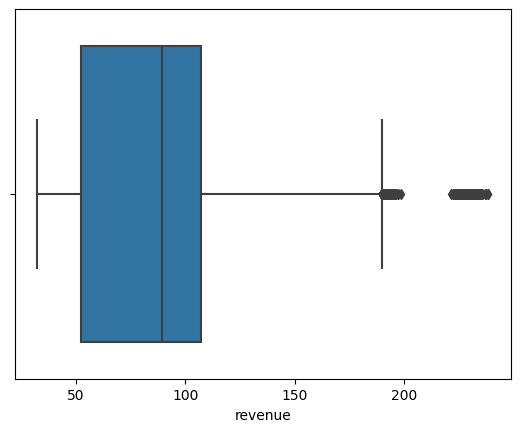

In [19]:
# Visualize
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='revenue', data=sales)

<AxesSubplot: xlabel='nb_sold', ylabel='revenue'>

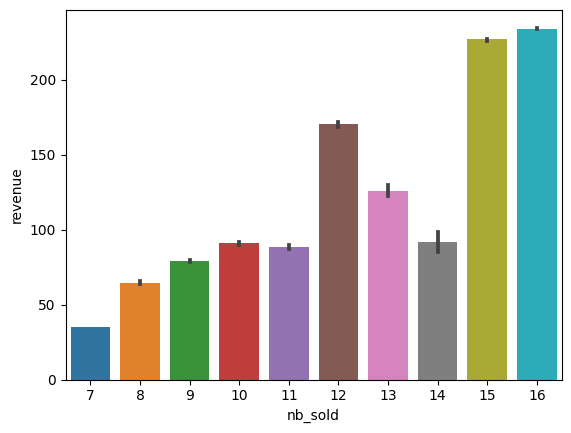

In [20]:
# Avg revenue grouped by number of products sold.
sns.barplot(x='nb_sold', y='revenue', data=sales)

In [21]:
# Number of null values in revenue grouped by number of products sold
sales.groupby('nb_sold')['revenue'].apply(lambda x: x.isnull().sum())

nb_sold
7      17
8     103
9     219
10    253
11    163
12    127
13     93
14      4
15     94
16      1
Name: revenue, dtype: int64

In [22]:
# Avg revenue grouped by nb_sold
sales.groupby('nb_sold')['revenue'].mean()

nb_sold
7      35.093833
8      64.525332
9      79.173694
10     91.033803
11     88.441736
12    170.161967
13    125.849634
14     91.635591
15    226.827766
16    234.143333
Name: revenue, dtype: float64

In [23]:
# Median revenue grouped by nb_sold
sales.groupby('nb_sold')['revenue'].median()

nb_sold
7      35.060
8      80.725
9      87.990
10     97.740
11    106.215
12    181.790
13    128.765
14     68.930
15    227.250
16    233.580
Name: revenue, dtype: float64

In [24]:
# Fill NA values with median revenue by nb_sold group.
median_revenue_by_nb_sold = sales.groupby('nb_sold')['revenue'].transform('median')
sales['revenue'] = sales['revenue'].fillna(median_revenue_by_nb_sold)

In [25]:
# Checking NA values
sales.groupby('nb_sold')['revenue'].apply(lambda x: x.isnull().sum())

nb_sold
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
Name: revenue, dtype: int64

<AxesSubplot: xlabel='nb_sold', ylabel='revenue'>

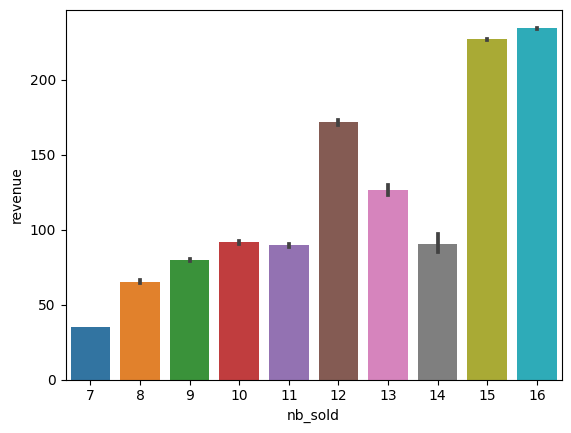

In [26]:
# New plot with no NAs
sns.barplot(x='nb_sold', y='revenue', data=sales)

In [27]:
sales['revenue'].describe()

count    15000.000000
mean        95.686204
std         47.740725
min         32.540000
25%         53.007500
50%         90.295000
75%        107.547500
max        238.320000
Name: revenue, dtype: float64

In [28]:
# Round to 2 decimal places
sales['revenue'] = sales['revenue'].round(2)

### 6. `years_as_customer`

In [29]:
# Check for any `years_as_customer` values that would be unfeasible:

# Max possible years as customer based on company founded in 1984
max_years_as_customer = 2023 - 1984

# Check for rows greater than max_years_as_customer
print(sales[sales['years_as_customer'] > max_years_as_customer])

       week sales_method  ... nb_site_visits       state
13741     2        Email  ...             24  California
13800     4         Call  ...             27  California

[2 rows x 8 columns]


In [30]:
# Rows where years_as_customer is unfeasible
yrs_over_max = sales['years_as_customer'] > max_years_as_customer
# Replace unfeasibly high years with the max feasible amount of years:
sales.loc[yrs_over_max, 'years_as_customer'] = max_years_as_customer

In [31]:
# Re-check for any rows that have unfeasbile amount of years:
print(sales[sales['years_as_customer'] > max_years_as_customer])

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


<AxesSubplot: >

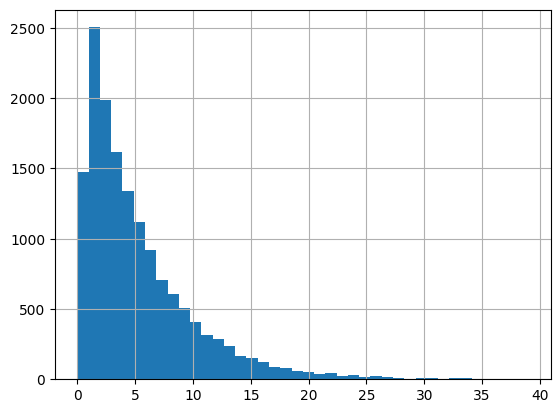

In [32]:
sales['years_as_customer'].hist(bins=40)

### 7. `nb_site_visits`

In [33]:
sales['nb_site_visits'].describe()

count    15000.000000
mean        24.990867
std          3.500914
min         12.000000
25%         23.000000
50%         25.000000
75%         27.000000
max         41.000000
Name: nb_site_visits, dtype: float64

### 8. `state`

In [34]:
sales['state'].nunique()

50

In [35]:
sales['state'].value_counts()

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

# Exploritory Analysis

## Exploring Sales Method

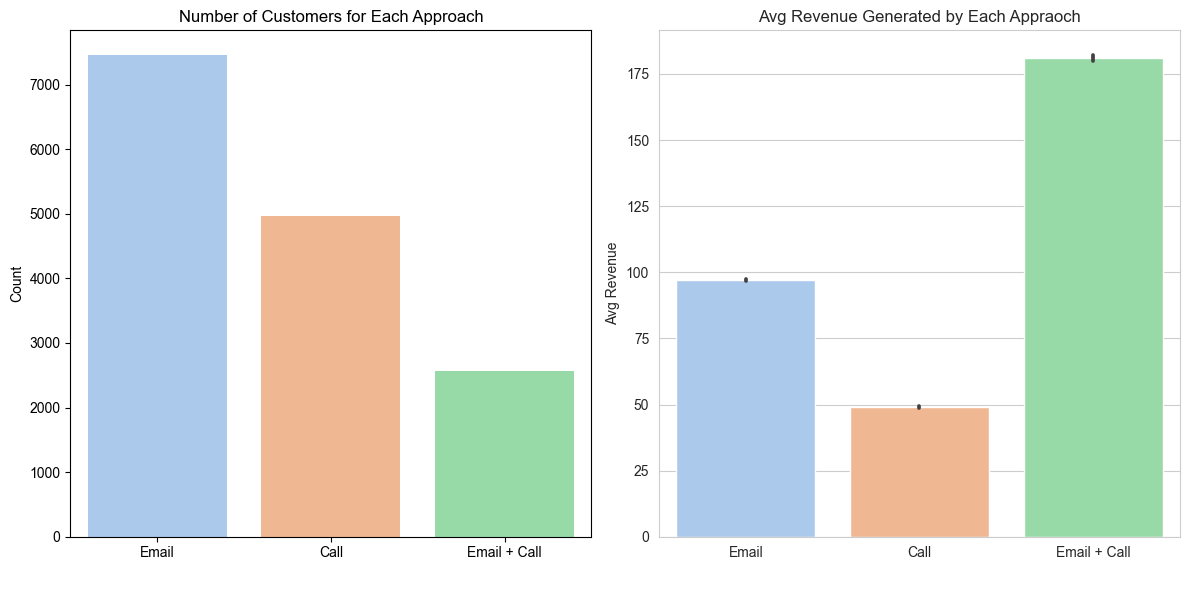

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  
sns.set_palette('pastel')

# First Plot
plt.subplot(1, 2, 1)  
g1 = sns.countplot(data=sales, x='sales_method', order=['Email', 'Call', 'Email + Call'])
sns.set_style("whitegrid")
g1.set_title("Number of Customers for Each Approach")
g1.set(xlabel=' ', ylabel='Count')

# Second Plot
plt.subplot(1, 2, 2)  
g2 = sns.barplot(data=sales, x='sales_method', y='revenue', order=['Email', 'Call', 'Email + Call'])
sns.set_style("whitegrid")
g2.set_title("Avg Revenue Generated by Each Appraoch")
g2.set(xlabel=' ', ylabel='Avg Revenue')

plt.tight_layout()

plt.show()

**Description:**
In the plots above, we can see that the majority of sales were a result of email outreach, followed by calls, and the least number of sales came from the combination of Email and Call. However, on the right, we see that sales that were made by the combination of Email and Call generated more revenue on average than sales which came from Email or Call. This is likely a sign that Emails are attracting people to the product, and when a salesperson calls the customer after they see the email, the salesperson can upsell.

## Spread of Revenue

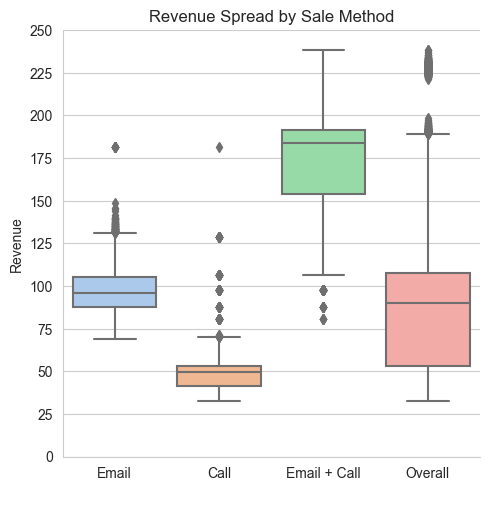

In [37]:
sns.set_palette('pastel')
# Creating a copy of sales to add a new column for the overall revenue spread:
combined_sales = sales.copy()
combined_sales['sales_method'] = 'Overall'
combined_data = pd.concat([sales, combined_sales], ignore_index=True)

# Boxplot using new combined_data
g = sns.catplot(x='sales_method', y='revenue', data=combined_data, kind='box', order=['Email', 'Call', 'Email + Call', 'Overall'], height=5, aspect=1)
g.set(xlabel=' ', ylabel='Revenue')

plt.title('Revenue Spread by Sale Method')
plt.yticks(range(0, 275, 25))

plt.show()


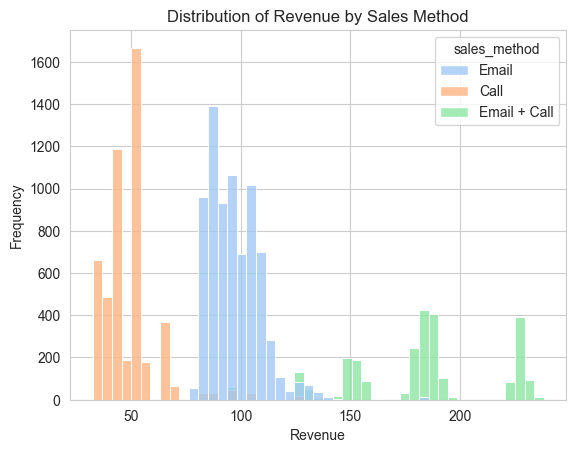

In [38]:
sns.histplot(x='revenue', hue='sales_method', data=sales, hue_order=['Email', 'Call', 'Email + Call'], alpha=0.8)
plt.title("Distribution of Revenue by Sales Method")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

**Description:**
We can look at the boxplots and histogram above to examine the spread of revenue for each sale approach. 
- The boxplots confirm what we determined earlier - that the combination of Email + Call generates more revenue on average that the other two methods. We can see that even the highest outliers for Call or Email do not even exceed the average revenue for Email + Call. This suggests that the Email + Call approach leads to consistently larger sales than the other two alternatives.
- In the histogram, we see three very clear distinctions between each group. We can see that call sales are mostly resulting in sales under 75. Sales from Email are consistently around 100. Sales from Email + Call have the most potential with sales that range from 150 to 250.

## Revenue Over Time:

**Revenue Trend by Sale Method**

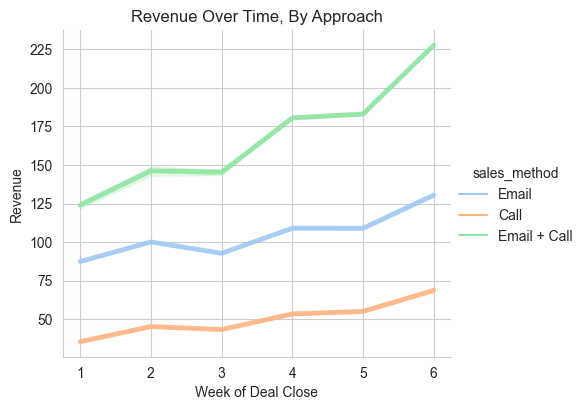

In [39]:
sns.relplot(x='week', y='revenue', hue='sales_method', data=sales, kind='line', height=4, aspect=1.2, hue_order=['Email', 'Call', 'Email + Call'], alpha=0.9, linewidth=3.5)
plt.title("Revenue Over Time, By Approach")
plt.xlabel("Week of Deal Close")
plt.ylabel("Revenue")
plt.xticks(range(1, 7, 1))
plt.show()

**Description:**
- In this line plot, we see that the revenue generated by a sale increases the further we get from orginal release date of the new product. This is a good sign that people are happy with the product. As more people own the product, it becomes more liekly for others to want to purchase - and these later purchases are larger.

**Number of Sales Each Week - By Sale Method**

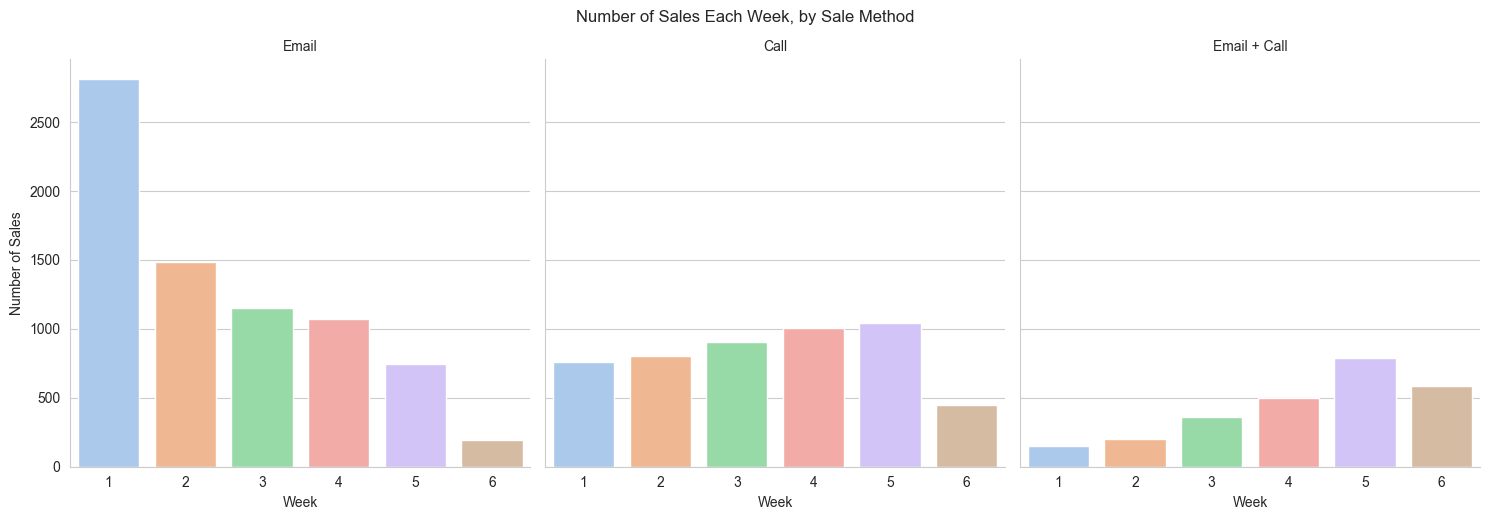

In [40]:
# Count plot of sales broken down by sale method
g = sns.catplot(x='week', data=sales, kind='count', col='sales_method', col_order=['Email', 'Call', 'Email + Call'])
g.fig.suptitle("Number of Sales Each Week, by Sale Method", y=1.03)
g.set_titles("{col_name}")
g.set(xlabel="Week", ylabel="Number of Sales")
plt.show()

**Description:**
- We can examine the number of purchases made each week, broken down by sale method. In these 3 side by side plots we can see that Email leads to a much faster purchase time, but the affects of the email decline over time. Alternatively, Call and Email + Call are less reactive. The outreach from these two methods take more time to result in a sale than email.

**Sales Per Week, Avg Revenue Per Week, Total Revenue Per Week**

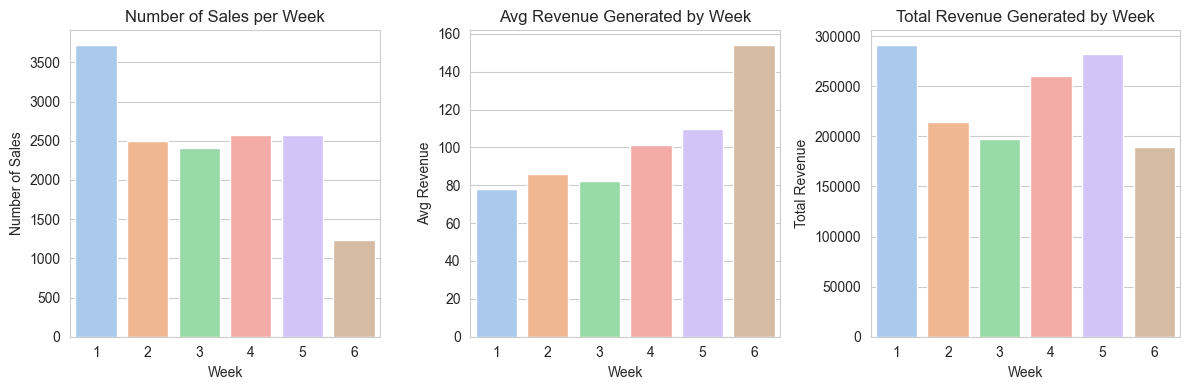

In [41]:
plt.figure(figsize=(12, 4)) 
sns.set_palette('pastel')

# First Plot: Number of sales per week:
plt.subplot(1, 3, 1)  
g1 = sns.countplot(x='week', data=sales)
g1.set_title("Number of Sales per Week")
g1.set(xlabel='Week', ylabel='Number of Sales')

# Second Plot: Avg Revenue per Week
plt.subplot(1, 3, 2)  
g2 = sns.barplot(x='week', y='revenue', data=sales, ci=None)
g2.set_title("Avg Revenue Generated by Week")
g2.set(xlabel='Week', ylabel='Avg Revenue')

# Third Plot: Total Revenue per week
plt.subplot(1, 3, 3) 
g3 = sns.barplot(x='week', y='revenue', data=sales, ci=None, estimator=sum)
g3.set_title("Total Revenue Generated by Week")
g3.set(xlabel='Week', ylabel='Total Revenue')

# Adjust the layout to prevent overlapping of titles
plt.tight_layout()

# Display the plots
plt.show()

**Description:**
- In the next three plots, we examine revenue in each week. We can see that the average revenue per sale is much higher in later weeks. This likely means that people who are considering larger purchases need more time before executing the purchase. While the number of total sales in week one is by far the highest, the revenue generated in weeks 4, 5, and 6 is almost as high as the revenue generated in week 1 because the average revenue in those later weeks is significantly greater.

**Total Revenue and Avg Revenue: Per Week, By Method**

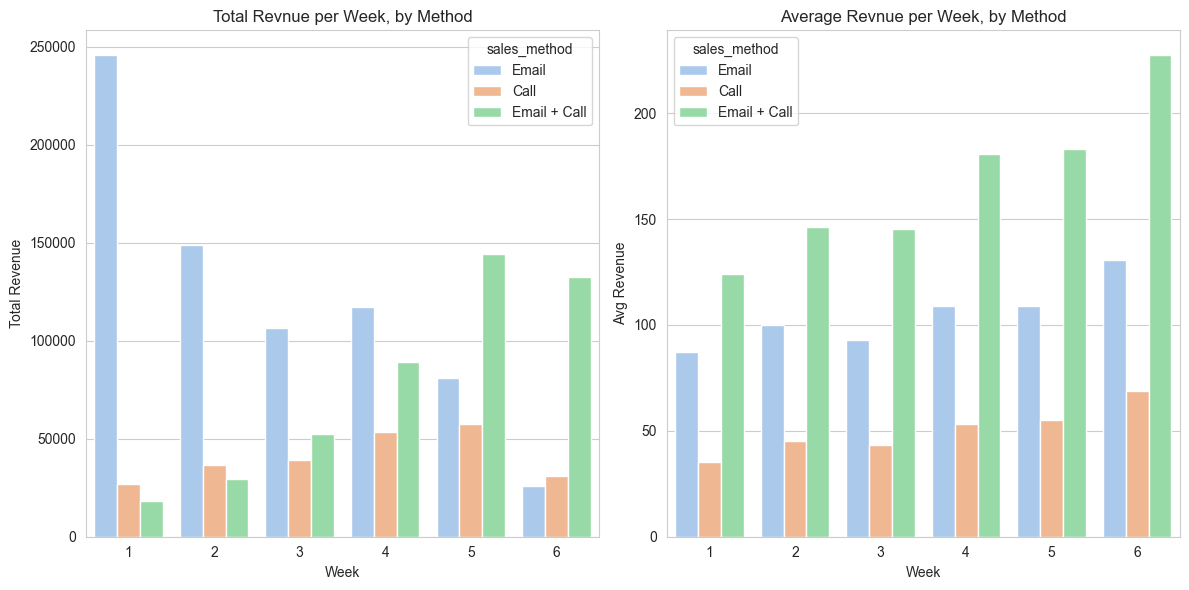

In [42]:
plt.figure(figsize=(12, 6)) 
sns.set_palette('pastel')

# First Plot: Total Revnue per Week, by Method
plt.subplot(1, 2, 1)  
g1 = sns.barplot(x='week', y='revenue', hue='sales_method', hue_order=['Email', 'Call', 'Email + Call'], data=sales, estimator=sum, ci=None)
g1.set_title("Total Revnue per Week, by Method")
g1.set(xlabel='Week', ylabel='Total Revenue')

# Second Plot: Avg Revenue per Week
plt.subplot(1, 2, 2)  
g2 = sns.barplot(x='week', y='revenue', hue='sales_method', hue_order=['Email', 'Call', 'Email + Call'], data=sales, ci=None)
g2.set_title("Average Revnue per Week, by Method")
g2.set(xlabel='Week', ylabel='Avg Revenue')

# Adjust the layout to prevent overlapping of titles
plt.tight_layout()

# Display the plots
plt.show()

**Description:**
- In the last plot, we see similar findings. The total revenue generated in the first 4 weeks were largely dominated by Email outreach, however these sales generated much less on average than the combination of Email + Call. We can clearly see that after the 4-week mark, Email + Call generates the most total revenue and has a much larger average sale than the other two alternatives.

## Time Efficiency

In [43]:
# Create a new column for the time it takes for each method:
def map_time(sales_method):
    if sales_method == 'Email':
        return 1
    elif sales_method == 'Call':
        return 30
    elif sales_method == 'Email + Call':
        return 11
    else:
        return None 

sales['time'] = sales['sales_method'].apply(map_time)

In [44]:
# New Column for Revenue per Minute:
sales['rev_per_hr'] = (sales['revenue'] / sales['time']) * 60

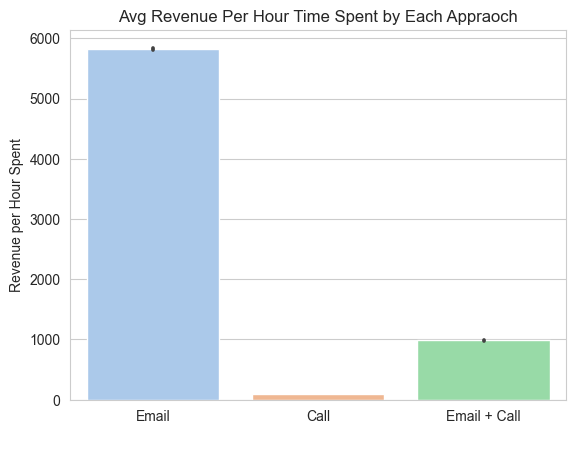

In [45]:
# Plot Revenue per Minute by Sale Method:
g = sns.barplot(data=sales, x='sales_method', y='rev_per_hr', order=['Email', 'Call', 'Email + Call'])
g.set_title("Avg Revenue Per Hour Time Spent by Each Appraoch")
g.set(xlabel=' ', ylabel='Revenue per Hour Spent')
plt.show()

**Description:**
- In order to factor in the labor that goes into each sales method, we created a new column `time`. The time for a Call is 30 minutes, Email is 1 Minute of time, and Email + Call is 11 miniutes (1min for email plus 10min call time).
- From this, we can derive the Average Revenue generated per hour of time spent on each sale method.
- Here, we can see that time spent on Call only is by far the most least efficient use of time. While emails are the most efficient, the extreamly high avg revenue from Email + Call suggests that the sales team would be most efficient if they stopped cold calling, and instead only reached out to customers who have already recieced an Email.

In [46]:
# Dividing States into Regions
region_mapping = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Southeast': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota', 'Wyoming'],
    'South': ['Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'Northwest': ['Idaho', 'Montana', 'Washington', 'Oregon'],
    'Southwest': ['Arizona', 'New Mexico', 'Nevada', 'Utah', 'Colorado', 'California'],
    'Other': ['Alaska', 'Hawaii']
}

def map_region(state):
    for region, states in region_mapping.items():
        if state in states:
            return region
    return 'Other' 

sales['region'] = sales['state'].apply(map_region)

## Regional Results

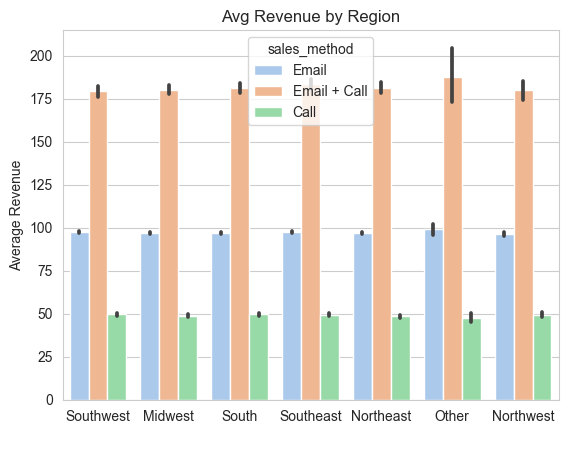

In [47]:
g = sns.barplot(x='region', y='revenue', hue='sales_method', data=sales)
g.set_title("Avg Revenue by Region")
g.set(xlabel=' ', ylabel='Average Revenue')
plt.show()

**Description:**
- We examined regional differences to see if different regional demographics lead to different sales results. Here we see that Average Revenue is essentially even across customers from each region. This suggests that the sales team should target each US region similarly.

## Metrics

**1. Avg. Revenue of Email Sales**
- Sales from Email outreach are much more frequent that the other methods, but since these sales are much smaller in value, they do not capture the majority of total revenue generated. If the sales team can find a way to promote larger transactions in their emails, a small increase in average revenue for this category will have a very large impact on total revenue. And this is the most cost efficient method.

In [48]:
# Initial Avg. Revenue for Email Outreach:
email_avg_rev = sales[sales['sales_method'] == 'Email']['revenue'].mean()
print(f"The current Average Revenue from Email sales is ${round(email_avg_rev,2)}")

The current Average Revenue from Email sales is $97.13


**2. Total Sales from Email + Call**
- We can see that the combination of Email and Call results in a much larger sale on average. The sale team should focus on this method of outreach more. Each additional sale from this method has a large impact of total revenue.

In [49]:
# Total Sales from Email and Call each Week:
ec_total_sales = sales.groupby(['week', 'sales_method'])['customer_id'].count()
print("The total number of sales from Email + Call for each of the first 6 weeks")
print(ec_total_sales.loc[:, 'Email + Call'])

The total number of sales from Email + Call for each of the first 6 weeks
week
1    148
2    200
3    359
4    495
5    787
6    583
Name: customer_id, dtype: int64


**3. Time Efficiency: Revenue per Hour**
- In order for the sales team to be most efficient, we should monitor the revenue generated per hour spent on a respective method.
- Since email outreach requires such little time, it is the most efficient method. However, the combination of Email and Call generates a lot of revenue.
- The sales team should attempt to measure the time spent on Email and Email + Call more accurately to improve efficiency.

In [50]:
# Initial Revenue per Hour calculation:
call_rev_per_hr = sales[sales['sales_method'] == 'Call']['rev_per_hr'].mean()
email_rev_per_hr = sales[sales['sales_method'] == 'Email']['rev_per_hr'].mean()
ec_rev_per_hr = sales[sales['sales_method'] == 'Email + Call']['rev_per_hr'].mean()
print(f"Revenue per Hour Spent on Calls ${round(call_rev_per_hr,2)}")
print(f"Revenue per Hour Spent on Email ${round(email_rev_per_hr,2)}")
print(f"Revenue per Hour Spent on Email + Calls ${round(ec_rev_per_hr,2)}")

Revenue per Hour Spent on Calls $98.41
Revenue per Hour Spent on Email $5828.1
Revenue per Hour Spent on Email + Calls $988.1


**4. Conversion**
- The most important piece of data that is missing from this dataset is the total amount of people that were reached out to using each method.
- We cannot find the conversion rate of each method without this information, and that is a very valuable metric to have. For example, while Email generates the most amount of sales, it likely has a much lower conversion rate that Email + Call because such a large group of people were probabably targeted with the email.
- The sales team should collect data on each customer that is targeted, and which method was used for targetting.
- Unfortunetely, with this current dataset, we cannot calculate conversion.

# Final Summary:
**Key Findings:**
- Email outreach is effective in generating quick, reactionary purchases. These sales are frequent, but lower in value. Quantity is key.
- Email + Call has very high upside and generates much larger sales. The sale horizon is longer, but effective in generating revenue.
- Call outreach without a prior email is ineffective, generates very little revenue per sale, and given the 30min time commitemnt, it is a very inefficient use of time.

**Reccomendations:**
- Focus on Email + Call. Sales team members should only call customers who have previously recieved an email. This is on average a shorter duration call and the sales from Email + Call are almost always larger in value than the sales from Call only (See Distribution of Revenue by Sales Method).
- Track all outreach made, and which method was used. This will allow us to calculate conversion rate. Understanding conversion can have a strong impact on our sales strategy going forward.